## Import Libraries

In [ ]:
## Data Cleaning Libraries
import pandas as pd
import numpy as np

## Data Visualisation Libraries
import seaborn as sns
import matplotlib.pyplot as plt

## Model Training Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

## Import Data

In [ ]:
## Using manual colab upload
x_train = pd.read_csv('x_train.csv')
y_train = pd.read_csv('y_train.csv')
x_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('y_test.csv')
subject_id_train = pd.read_csv('subject_id_train.txt',header=None)
subject_id_test = pd.read_csv('subject_id_test.txt',header=None)

In [ ]:
upsampled_x_train = pd.read_csv('x_train_upsampled.csv')
upsampled_y_train = pd.read_csv('y_train_upsampled.csv')

In [ ]:
upsampled_y_train

,Label
0,WALKING
1,WALKING
2,WALKING
3,WALKING
4,WALKING
...,...
17071,LIE_TO_STAND
17072,LIE_TO_STAND
17073,LIE_TO_STAND
17074,LIE_TO_STAND


In [ ]:
upsampled_x_train

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,0.059214,0.015657,-0.046926,-0.159856,-0.363889,-0.411356,-0.198068,-0.396310,-0.531267,0.108468,...,0.184349,-0.080368,-0.466699,-0.232134,-0.564892,0.864226,-0.183468,-0.835475,0.177212,-0.060935
1,-0.002361,0.005842,-0.021440,-0.400287,-0.466226,-0.511695,-0.467465,-0.494648,-0.588229,0.051339,...,0.225846,-0.247804,-0.622271,0.833712,-0.182967,0.892425,-0.538010,-0.694705,0.232327,0.191555
2,0.026992,0.008731,-0.020186,-0.397459,-0.406205,-0.545171,-0.457165,-0.429838,-0.617032,0.177636,...,0.291580,0.754823,0.690149,0.660902,0.248274,-0.600288,-0.373814,-0.729788,0.270730,0.097559
3,0.029504,-0.001841,-0.041028,-0.240609,-0.461972,-0.485811,-0.281841,-0.519699,-0.588882,0.043788,...,0.059125,-0.227447,-0.637051,0.318715,-0.891571,-0.642665,0.350881,-0.888126,0.157831,-0.027420
4,0.046806,0.010970,-0.034185,-0.495684,-0.452565,-0.618916,-0.549967,-0.500814,-0.664063,-0.146838,...,0.033451,0.522807,0.336893,-0.160155,-0.473816,0.593418,-0.036016,-0.743567,0.259305,0.100132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17071,0.785913,-0.467238,-0.281865,-0.339191,0.011646,-0.279447,-0.360539,-0.078825,-0.338668,0.464503,...,0.235177,-0.482503,-0.800379,0.264612,0.405350,-0.363142,-0.367260,0.394531,-0.836335,-0.079453
17072,0.599410,-0.525516,0.018955,-0.350108,-0.074209,-0.534880,-0.395172,-0.155167,-0.626435,0.340226,...,-0.283296,0.119084,-0.180826,0.221660,0.571314,-0.300102,0.983353,0.181950,-0.678839,-0.136320
17073,0.622266,-0.332030,-0.636876,-0.228774,-0.081363,0.038948,-0.257215,-0.080423,-0.074377,0.303507,...,-0.106728,-0.572974,-0.889397,0.262656,0.371522,-0.148880,-0.215603,0.098211,-0.244101,-0.591905
17074,0.661512,-0.474524,-0.828131,-0.124730,-0.143476,-0.180189,-0.143137,-0.206159,-0.296899,0.211808,...,-0.307534,-0.026630,-0.426719,0.169178,0.832841,-0.302405,0.726931,-0.139231,-0.299054,-0.380213


# Balanced Data

## Training SVM

In [ ]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(upsampled_x_train, upsampled_y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma='auto')

In [ ]:
y_pred = svc.predict(x_test)
y_pred

array(['STANDING', 'STANDING', 'STANDING', ..., 'WALKING_UPSTAIRS',
       'WALKING_UPSTAIRS', 'WALKING'], dtype=object)

In [ ]:
accuracy_score(y_test, y_pred)

0.9329538266919671

In [ ]:
print(classification_report(y_test,y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       545
        LIE_TO_SIT       0.75      0.84      0.79        25
      LIE_TO_STAND       0.78      0.67      0.72        27
           SITTING       0.92      0.88      0.90       508
        SIT_TO_LIE       0.64      0.84      0.73        32
      SIT_TO_STAND       0.77      1.00      0.87        10
          STANDING       0.90      0.92      0.91       556
      STAND_TO_LIE       0.74      0.69      0.72        49
      STAND_TO_SIT       0.74      0.74      0.74        23
           WALKING       0.94      0.99      0.97       496
WALKING_DOWNSTAIRS       0.98      0.91      0.94       420
  WALKING_UPSTAIRS       0.94      0.95      0.95       471

          accuracy                           0.93      3162
         macro avg       0.84      0.87      0.85      3162
      weighted avg       0.93      0.93      0.93      3162



In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'linear', 'sigmoid']}
grid = GridSearchCV(SVC(), param_grid, refit=True,verbose=2)
grid.fit(upsampled_x_train, np.ravel(upsampled_y_train))
print(grid.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.7min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.8min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.7min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 1.9min
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time= 2.0min
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   3.6s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   3.4s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   3.7s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   5.2s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   3.8s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time= 2.1min
[CV] END .....................C=0.1, gamma=1, k

In [ ]:
from sklearn.svm import SVC
svc = SVC(C=100, gamma=0.01)
svc.fit(upsampled_x_train, np.ravel(upsampled_y_train))
y_pred = svc.predict(x_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.9509803921568627

In [ ]:
print(classification_report(y_test,y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       545
        LIE_TO_SIT       0.81      0.84      0.82        25
      LIE_TO_STAND       0.82      0.67      0.73        27
           SITTING       0.97      0.89      0.93       508
        SIT_TO_LIE       0.68      0.72      0.70        32
      SIT_TO_STAND       0.91      1.00      0.95        10
          STANDING       0.91      0.98      0.94       556
      STAND_TO_LIE       0.72      0.73      0.73        49
      STAND_TO_SIT       0.90      0.78      0.84        23
           WALKING       0.96      0.98      0.97       496
WALKING_DOWNSTAIRS       0.99      0.94      0.97       420
  WALKING_UPSTAIRS       0.94      0.97      0.96       471

          accuracy                           0.95      3162
         macro avg       0.88      0.88      0.88      3162
      weighted avg       0.95      0.95      0.95      3162



## Training LDA with SVM

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_clf = LinearDiscriminantAnalysis()
x_train_lda = lda_clf.fit_transform(upsampled_x_train, np.ravel(upsampled_y_train))
x_test_lda = lda_clf.transform(x_test)

In [ ]:
from sklearn.svm import SVC
svc = SVC(C=100, gamma=0.01, kernel="rbf")
svc.fit(x_train_lda, upsampled_y_train)
y_pred = svc.predict(x_test_lda)
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['STANDING', 'STANDING', 'STANDING', ..., 'WALKING_UPSTAIRS',
       'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS'], dtype=object)

In [ ]:
print(classification_report(y_test,y_pred))

                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       545
        LIE_TO_SIT       0.74      0.56      0.64        25
      LIE_TO_STAND       0.66      0.70      0.68        27
           SITTING       0.94      0.88      0.91       508
        SIT_TO_LIE       0.63      0.75      0.69        32
      SIT_TO_STAND       1.00      1.00      1.00        10
          STANDING       0.90      0.96      0.93       556
      STAND_TO_LIE       0.78      0.65      0.71        49
      STAND_TO_SIT       1.00      0.83      0.90        23
           WALKING       0.95      0.97      0.96       496
WALKING_DOWNSTAIRS       0.99      0.97      0.98       420
  WALKING_UPSTAIRS       0.95      0.95      0.95       471

          accuracy                           0.94      3162
         macro avg       0.88      0.85      0.86      3162
      weighted avg       0.94      0.94      0.94      3162



In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'sigmoid']}
grid = GridSearchCV(SVC(), param_grid, refit=True,verbose=2)
grid.fit(x_train_lda, np.ravel(upsampled_y_train))
print(grid.best_estimator_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  22.4s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  22.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  23.3s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  22.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  22.8s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   7.2s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   7.2s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   7.2s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   7.2s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   7.8s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   4.1s
[CV] END .......................C=0.1, gamma=0.

Overall, the model does almost equally well on the LDA features. Hence, it would be better to use the LDA method as this would drastically reduce the features from 561 to 10.

# Imbalanced Data

## Training SVC

In [ ]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma='auto')

In [ ]:
y_pred = svc.predict(x_test)
y_pred

array(['STANDING', 'STANDING', 'STANDING', ..., 'WALKING_UPSTAIRS',
       'WALKING_UPSTAIRS', 'WALKING'], dtype=object)

In [ ]:
accuracy_score(y_test, y_pred)

0.9184060721062619

In [ ]:
print(classification_report(y_test,y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       545
        LIE_TO_SIT       0.53      0.92      0.68        25
      LIE_TO_STAND       0.75      0.11      0.19        27
           SITTING       0.91      0.86      0.88       508
        SIT_TO_LIE       0.61      0.62      0.62        32
      SIT_TO_STAND       1.00      0.10      0.18        10
          STANDING       0.88      0.93      0.90       556
      STAND_TO_LIE       0.64      0.55      0.59        49
      STAND_TO_SIT       0.71      0.65      0.68        23
           WALKING       0.94      0.99      0.96       496
WALKING_DOWNSTAIRS       0.98      0.90      0.94       420
  WALKING_UPSTAIRS       0.91      0.96      0.93       471

          accuracy                           0.92      3162
         macro avg       0.82      0.72      0.71      3162
      weighted avg       0.92      0.92      0.91      3162



### Hyperparameter Tuning for SVC

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(), param_grid, refit=True,verbose=2)
grid.fit(x_train, np.ravel(y_train))
print(grid.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  30.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  30.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  32.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  30.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=  30.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   1.4s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=  15.3s
[CV] END .....................C=0.1, gamma=1, k

In [ ]:
from sklearn.svm import SVC
svc = SVC(C=100, gamma=0.01, kernel="rbf")
svc.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, gamma=0.01)

In [ ]:
y_pred = svc.predict(x_test)
y_pred

array(['STANDING', 'STANDING', 'STANDING', ..., 'WALKING_UPSTAIRS',
       'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS'], dtype=object)

In [ ]:
accuracy_score(y_test, y_pred)

0.9528779253636939

In [ ]:
print(classification_report(y_test,y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       545
        LIE_TO_SIT       0.81      0.84      0.82        25
      LIE_TO_STAND       0.82      0.67      0.73        27
           SITTING       0.97      0.90      0.93       508
        SIT_TO_LIE       0.68      0.72      0.70        32
      SIT_TO_STAND       0.91      1.00      0.95        10
          STANDING       0.92      0.98      0.95       556
      STAND_TO_LIE       0.71      0.71      0.71        49
      STAND_TO_SIT       0.95      0.78      0.86        23
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.94      0.97       420
  WALKING_UPSTAIRS       0.94      0.97      0.95       471

          accuracy                           0.95      3162
         macro avg       0.89      0.87      0.88      3162
      weighted avg       0.95      0.95      0.95      3162



## SVM with PCA

### Finding PCs

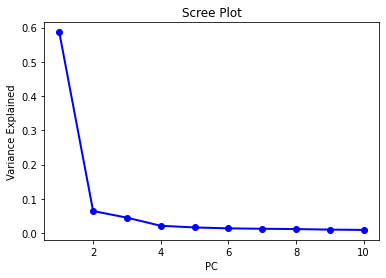

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca_fit = pca.fit(x_train)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values,pca.explained_variance_ratio_,'o-',linewidth=2,color='blue')
plt.title('Scree Plot')
plt.xlabel('PC')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
pca = PCA(n_components=3)
pca.fit(x_train)
x_components = pca.transform(x_train)
x_train_pca = pd.DataFrame(x_components,columns=['component1','component2', 'component3'])
x_train_pca

,component1,component2,component3
0,-5.387022,-0.132260,-1.515513
1,-5.414531,-0.517030,-1.711622
2,-5.368307,-1.026914,-1.835912
3,-5.556222,-1.421825,-1.469106
4,-5.619160,-1.701454,-1.514951
...,...,...,...
7762,5.689451,2.145656,-0.595008
7763,5.244816,1.986539,-0.507288
7764,5.260608,2.670623,-0.554441
7765,4.817492,2.918323,-0.679897


In [ ]:
x_test_components = pca.transform(x_test)
x_test_pca = pd.DataFrame(x_test_components,columns=['component1','component2', 'component3'])
x_test_pca

,component1,component2,component3
0,-2.639285,0.521253,-1.123581
1,-4.214242,-0.016512,-1.358678
2,-4.869401,-1.202681,-1.404980
3,-4.982240,-1.110152,-1.602126
4,-4.912045,-0.370558,-1.946085
...,...,...,...
3157,4.059225,0.909778,-0.524591
3158,4.586652,0.469717,-0.370357
3159,4.188020,0.630251,-0.319896
3160,3.451478,0.693174,-0.554393


### Using on SVM

In [ ]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(x_train_pca, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma='auto')

In [ ]:
y_pred = svc.predict(x_test_pca)
y_pred

array(['STANDING', 'STANDING', 'STANDING', ..., 'WALKING_UPSTAIRS',
       'WALKING', 'WALKING'], dtype=object)

In [ ]:
accuracy_score(y_test, y_pred)

0.7634408602150538

In [ ]:
print(classification_report(y_test,y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      0.97      0.98       545
        LIE_TO_SIT       0.65      0.52      0.58        25
      LIE_TO_STAND       0.64      0.52      0.57        27
           SITTING       0.82      0.50      0.62       508
        SIT_TO_LIE       0.47      0.53      0.50        32
      SIT_TO_STAND       0.43      0.30      0.35        10
          STANDING       0.67      0.92      0.78       556
      STAND_TO_LIE       0.57      0.41      0.48        49
      STAND_TO_SIT       0.38      0.39      0.38        23
           WALKING       0.67      0.89      0.76       496
WALKING_DOWNSTAIRS       0.70      0.52      0.60       420
  WALKING_UPSTAIRS       0.86      0.81      0.83       471

          accuracy                           0.76      3162
         macro avg       0.65      0.61      0.62      3162
      weighted avg       0.78      0.76      0.76      3162



### Hyperparameter Tuning for SVM

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(), param_grid, refit=True,verbose=2)
grid.fit(x_train_pca, np.ravel(y_train))
print(grid.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.8s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  11.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  10.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   9.6s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  19.9s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=  16.3s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   1.8s
[CV] END .....................C=0.1, gamma=1, k

In [ ]:
from sklearn.svm import SVC
svc = SVC(C=100, gamma=0.001, kernel='sigmoid')
svc.fit(x_train_pca, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, gamma=0.001, kernel='sigmoid')

In [ ]:
y_pred = svc.predict(x_test_pca)
y_pred

array(['SITTING', 'STANDING', 'STANDING', ..., 'WALKING_UPSTAIRS',
       'WALKING', 'WALKING'], dtype=object)

In [ ]:
accuracy_score(y_test, y_pred)

0.7514231499051234

In [ ]:
print(classification_report(y_test,y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      0.98      0.99       545
        LIE_TO_SIT       0.54      0.60      0.57        25
      LIE_TO_STAND       0.53      0.30      0.38        27
           SITTING       0.78      0.54      0.63       508
        SIT_TO_LIE       0.32      0.38      0.35        32
      SIT_TO_STAND       1.00      0.20      0.33        10
          STANDING       0.68      0.88      0.76       556
      STAND_TO_LIE       0.44      0.35      0.39        49
      STAND_TO_SIT       0.44      0.17      0.25        23
           WALKING       0.65      0.90      0.75       496
WALKING_DOWNSTAIRS       0.69      0.47      0.56       420
  WALKING_UPSTAIRS       0.84      0.81      0.83       471

          accuracy                           0.75      3162
         macro avg       0.66      0.55      0.57      3162
      weighted avg       0.76      0.75      0.74      3162



## SVM with LDA

### Getting features from LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_clf = LinearDiscriminantAnalysis()
x_train_lda = lda_clf.fit_transform(x_train, np.ravel(y_train))
x_test_lda = lda_clf.transform(x_test)

In [ ]:
x_train_lda.shape

(7767, 11)

In [ ]:
x_test_lda.shape

(3162, 11)

### Traing on SVM

In [ ]:
from sklearn.svm import SVC
svc = SVC(C=100, gamma=0.01, kernel="rbf")
svc.fit(x_train_lda, y_train)
y_pred = svc.predict(x_test_lda)
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['STANDING', 'STANDING', 'STANDING', ..., 'WALKING_UPSTAIRS',
       'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS'], dtype=object)

In [ ]:
accuracy_score(y_test, y_pred)

0.9500316255534472

In [ ]:
print(classification_report(y_test,y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       545
        LIE_TO_SIT       0.76      0.52      0.62        25
      LIE_TO_STAND       0.63      0.70      0.67        27
           SITTING       0.95      0.88      0.91       508
        SIT_TO_LIE       0.72      0.66      0.69        32
      SIT_TO_STAND       1.00      0.70      0.82        10
          STANDING       0.90      0.96      0.93       556
      STAND_TO_LIE       0.63      0.78      0.70        49
      STAND_TO_SIT       0.87      0.87      0.87        23
           WALKING       0.97      0.99      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.97      0.97      0.97       471

          accuracy                           0.95      3162
         macro avg       0.87      0.83      0.85      3162
      weighted avg       0.95      0.95      0.95      3162



### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'sigmoid']}
grid = GridSearchCV(SVC(), param_grid, refit=True,verbose=2)
grid.fit(x_train_lda, np.ravel(y_train))
print(grid.best_estimator_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   5.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   5.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   8.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   7.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   7.6s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   2.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   1.9s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   2.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   2.2s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   2.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.9s
[CV] END .......................C=0.1, gamma=0.

In [ ]:
from sklearn.svm import SVC
svc = SVC(C=1, gamma=0.001, kernel="rbf")
svc.fit(x_train_lda, y_train)
y_pred = svc.predict(x_test_lda)
y_pred

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['STANDING', 'STANDING', 'STANDING', ..., 'WALKING_UPSTAIRS',
       'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS'], dtype=object)

In [ ]:
accuracy_score(y_test, y_pred)

0.9512966476913346

In [ ]:
print(classification_report(y_test,y_pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       545
        LIE_TO_SIT       0.70      0.56      0.62        25
      LIE_TO_STAND       0.66      0.70      0.68        27
           SITTING       0.94      0.88      0.91       508
        SIT_TO_LIE       0.70      0.72      0.71        32
      SIT_TO_STAND       1.00      1.00      1.00        10
          STANDING       0.90      0.96      0.93       556
      STAND_TO_LIE       0.78      0.71      0.74        49
      STAND_TO_SIT       0.81      0.91      0.86        23
           WALKING       0.97      0.99      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.97      0.97      0.97       471

          accuracy                           0.95      3162
         macro avg       0.87      0.87      0.87      3162
      weighted avg       0.95      0.95      0.95      3162



Overall, the model seems to do better with the LDA features, compared to the PCA features. This could be because the labels used to create the LDA features may have helped to create better features.

## Feature Selection for SVM

### Using Anova F-test

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

score_list = []
k_list = []
for k in range(1, 302, 10):
  k_list.append(k)
  fs = SelectKBest(score_func=f_classif, k=k)
  fs.fit(x_train, np.ravel(y_train))
  cols = fs.get_support(indices=True)
  x_new_train_anova = x_train.iloc[:,cols]
  x_new_test_anova = x_test.iloc[:, cols]

  clf = SVC(C=100, gamma=0.01, kernel="rbf").fit(x_new_train_anova, np.ravel(y_train))
  y_pred = clf.predict(x_new_test_anova)
  score_list.append(accuracy_score(y_test, y_pred))

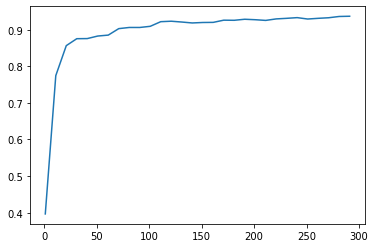

In [ ]:
## C = 100
plt.plot(k_list, score_list)

As seen from the graph, we would need about 50 to 100 features to acheive the same accuracy. 